## AccelerateAI - Time Series Analysis and Forecasting

### SARIMA Models

In [27]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

In [28]:
# Read the daily website visits data
visits=pd.read_csv('website-visits.csv')

In [29]:
# Data Cleaning
visits=visits.replace(',','',regex=True)
visits['PageLoads']=visits['PageLoads'].astype(int)
visits['UniqueVisits']=visits['UniqueVisits'].astype(int)
visits['FirstTimeVisits']=visits['FirstTimeVisits'].astype(int)
visits['ReturningVisits']=visits['ReturningVisits'].astype(int)

#Convert to datetime
visits['Date']= pd.to_datetime(visits['Date'])

#Check
visits.head()

,Row,Day,DayOfWeek,Date,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits
0,1,Sunday,1,2014-09-14,2146,1582,1430,152
1,2,Monday,2,2014-09-15,3621,2528,2297,231
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287
4,5,Thursday,5,2014-09-18,3316,2366,2130,236


In [ ]:
# Stationarity check 
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(visits['UniqueVisits'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','# Observations'])
print(dfoutput)

Conclusion: 
- H0: β = 0 (equivalent to φ = 1) =>  the time series has a unit root, meaning it is non-stationary 
- **p-value < 0.05**; We reject the H0. The data is stationary.

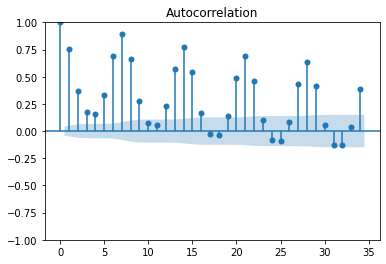

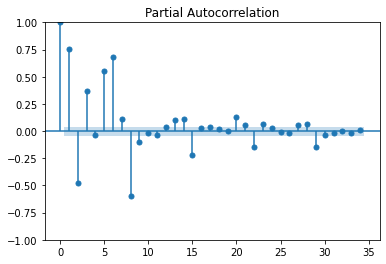

In [30]:
#ACF and PACF plots to identify model order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_res = plot_acf(visits['UniqueVisits'])
pacf_res = plot_pacf(visits['UniqueVisits'], method='ywm')

### AutoARIMA using PDMARIMA 

In [ ]:
from pmdarima.arima import auto_arima

In [31]:
series = visits['UniqueVisits']

sa_model = auto_arima(series, start_p=1, start_q=1,
                      test='adf',
                      d=1, D=1, m=7,
                      start_P=0, start_Q=0,
                      max_P=2, max_Q=2,
                      seasonal=True,   
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=30365.046, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=30044.302, Time=0.52 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=29721.962, Time=1.20 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=30352.415, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=2.82 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=29630.539, Time=4.22 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=6.35 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=29628.741, Time=2.13 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=29721.132, Time=0.41 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=7.55 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=1.30 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=29630.616, Time=4.68 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=inf, Time=5.18 sec
 ARIMA(0,1,0)(0,1,2)[7] intercept   : AIC=29630.693, Ti

In [32]:
sa_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 2167
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 7)   Log Likelihood              -14811.371
Date:                                Sat, 05 Nov 2022   AIC                          29628.741
Time:                                        18:55:09   BIC                          29645.774
Sample:                                             0   HQIC                         29634.971
                                               - 2167                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -0.6599      0.016    -40.419      0.000      -0.692      -0.628
ma.S.L14      -0.2369      0.017    -14.278      0.000      -0.269      -0.204
sigma2      5.299e+04   1086.297     48.781      0.000    5.09e+04    5.51e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               730.28
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
# Check with Statsmodels 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(series, order=(0,1,0),
              seasonal_order=(0,1,2,7),
              enforce_invertibility=False)

sm_model=model.fit()

print(sm_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                         UniqueVisits   No. Observations:                 2167
Model:             ARIMA(0, 1, 0)x(0, 1, [1, 2], 7)   Log Likelihood              -14811.371
Date:                              Sat, 05 Nov 2022   AIC                          29628.741
Time:                                      18:55:43   BIC                          29645.774
Sample:                                           0   HQIC                         29634.971
                                             - 2167                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -0.6599      0.016    -40.420      0.000      -0.692      -0.628
ma.S.L14      -0.23

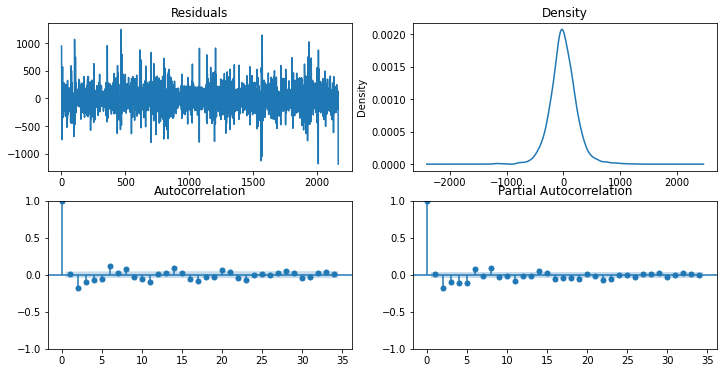

In [34]:
# Residual Plots 
residuals = sm_model.resid[1:]

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
residuals.plot(title='Residuals', ax=ax[0][0])
residuals.plot(title='Density', kind='kde', ax=ax[0][1])
plot_acf(residuals, ax=ax[1][0])
plot_pacf(residuals, method='ywm', ax=ax[1][1])
plt.show()

***